initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-09 00:00:00 -> 2017-01-13 23:55:00 length: 1440
plotting...


C:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn

--- running time: 2.4982588291168213---


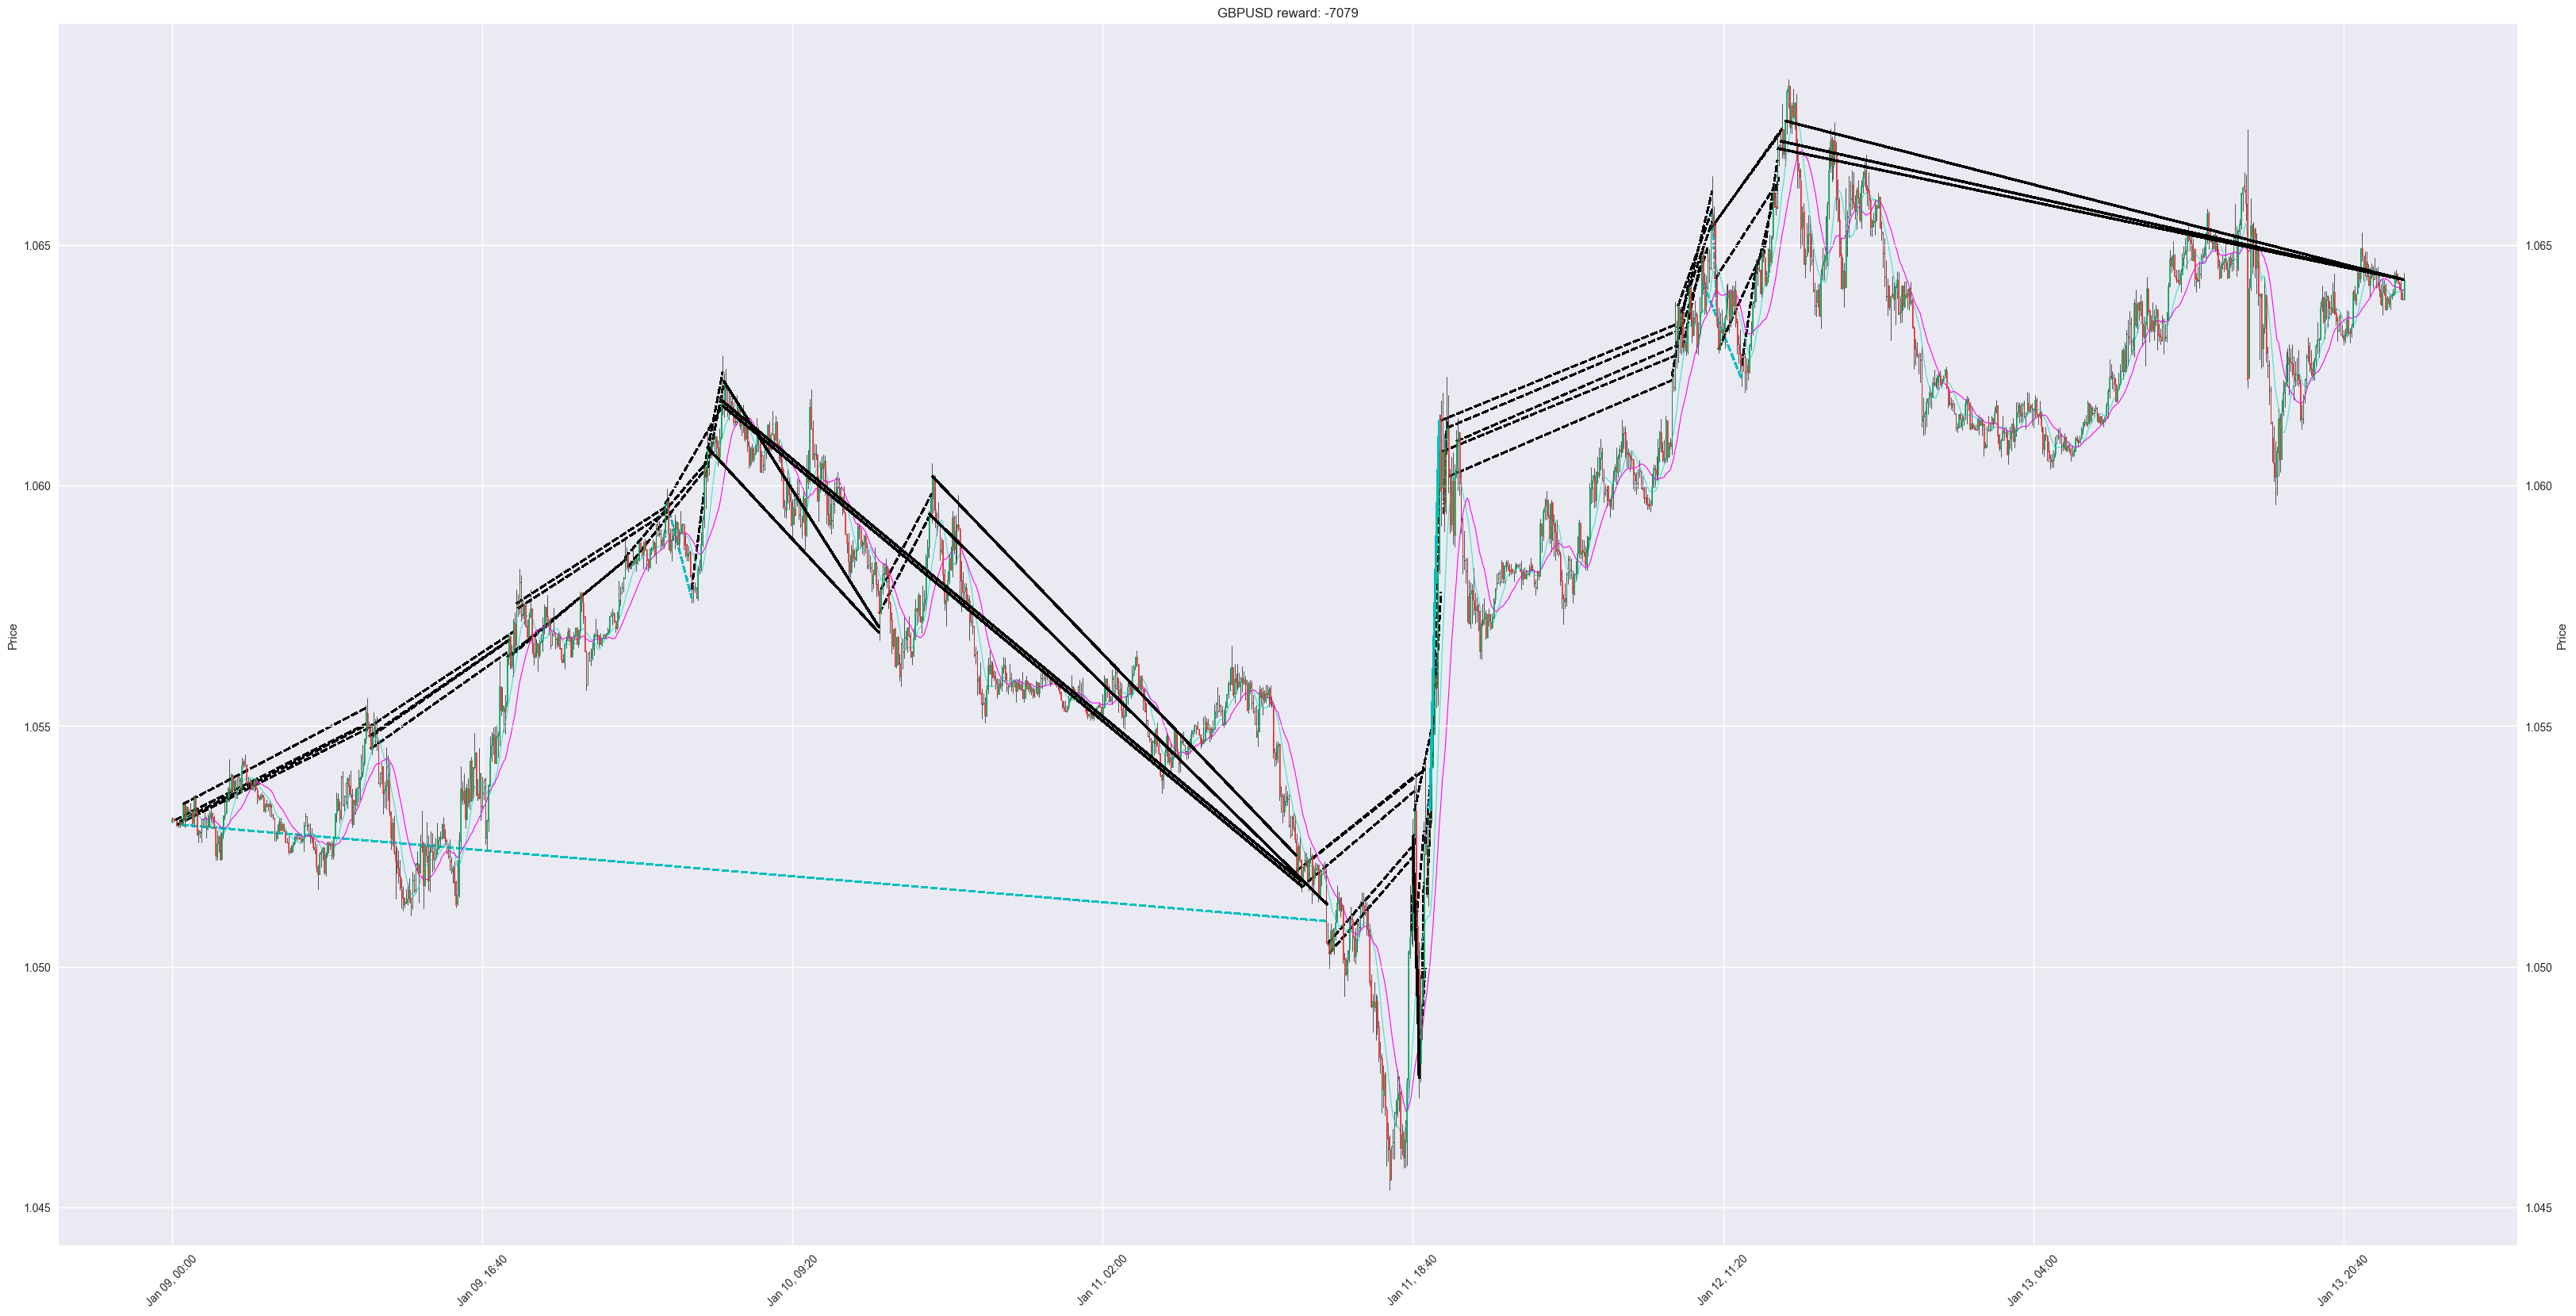

In [4]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_1.csv"
df = pd.read_csv(file)
env_name ="TradingGym-v1"
# t = gym.make(env_name)
t = tgym(df)
# if model: del model # remove to demonstrate saving and loading
model_name='test-2'
model = PPO.load(model_name)

start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    # print(form_action(action[0]))
t.render(mode='graph')
print(f"--- running time: {(time.time() - start_time)}---")

In [7]:
from neo_finrl.env_fx_trading.util.plot_chart import TradingChart
p = TradingChart(t.df, t.transaction_history)
p.transaction_line('GBPUSD')

([[('2017-01-27 18:10:00', 1.06941), ('2017-01-27 23:55:00', 1.06978)]],
 ['k'],
 [[('2017-01-27 16:15:00', 1.07153), ('2017-01-27 18:10:00', 1.06953)]],
 ['k'],
 -2690)

In [ ]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_2.csv"
df = pd.read_csv(file)
env_name ="TradingGym-v1"
env = gym.make(env_name)

In [ ]:
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
from stable_baselines3 import PPO
model = PPO.load("test")
obs = env.reset()
done=False
step = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    step +=1
    a, r = form_action(action[0])
    print(step, action, a, r , rewards)
env.render(mode='graph')